# Implied Probability via Butterfly Spreads

Using butterfly spreads to approximate the risk-neutral pdf of an asset.

### Resources Used
*Options, Futures, and Other Derivatives* - John C. Hull
*Option Pricing and Volatility* - Sheldon Natenberg
[*How Options Implied Probabilities Are Calculated*](https://www.morganstanley.com/content/dam/msdotcom/en/assets/pdfs/Options_Probabilities_Exhibit_Link.pdf) - Morgan Stanley Research

### Building a butterfly

A butterfly consists of options at three equally-spaced strike prices with a short position at the middle strike and long positions on the outer strikes (all with the same maturity). The ratio of contracts should be 1:2:1 and this can be done with calls or puts.

In [55]:
# Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Let's check out how this works by adding the options to position one at a time.

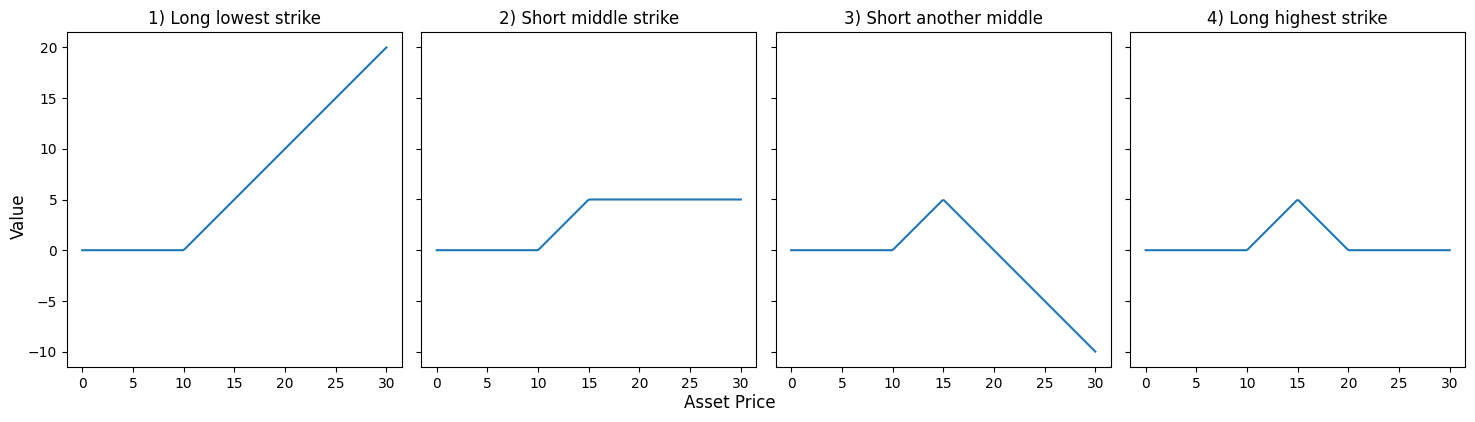

In [56]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15, 4))
x = np.linspace(0,30,200)

y = np.maximum(x-10,0)  # Intrinsic value of call with strike at 10
ax[0].title.set_text('1) Long lowest strike')
ax[0].set_aspect('equal', share=True)
ax[0].plot(x,y)

y -= np.maximum(x-15,0)
ax[1].title.set_text('2) Short middle strike')
ax[1].plot(x,y)

y -= np.maximum(x-15,0)
ax[2].title.set_text('3) Short another middle')
ax[2].plot(x,y)

y += np.maximum(x-20,0)
ax[3].title.set_text('4) Long highest strike')
ax[3].plot(x,y)

fig.supxlabel("Asset Price")
fig.supylabel("Value")
fig.tight_layout();

It works the same way with puts:

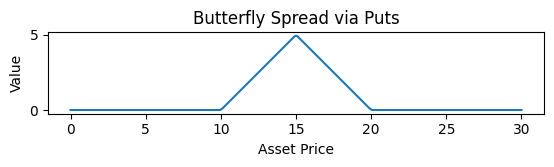

In [57]:
x = np.linspace(0,30,200)
y = np.maximum(10-x,0) - 2 * np.maximum(15-x,0) + np.maximum(20-x,0)  # All positions together

plt.gca().set_aspect('equal')
plt.title('Butterfly Spread via Puts')
plt.ylabel('Value')
plt.xlabel('Asset Price')
plt.plot(x,y);

### Probabilities from Butterflies

Let's call our middle strike $K$ and the spread to the next strike $\delta$. This means we have options at strikes $K - \delta$, $K$, and $K + \delta$. How can we get a probability from this position? Instead, let's think about how we would go about pricing this butterfly if we could not just look it up. 

Let's think about the butterfly above with strikes at 10, 15, and 20. We need the value of the butterfly given that we are between 10 and 20 as well as the probability (p) that we are between those strikes. Given that $\delta$ is small, we can assume p is the same across the entire $2\delta$ spread. 

Given that we are between 10 and 15, the value of the butterfly is simply the area under the triangle. So, $0.5 \times base \times height$. That will be $0.5 \times 2\delta \times \delta$ or just $\delta^{2}$.

Now we have: 
$$butterfly = p \times \delta^{2}$$

If we know how much the butterfly costs, we can back out p! Almost. The right hand side is the value at expiration, and since options generally have a stock-type settlement (meaning options are paid for upfront), we have to discount this.

So finally we have:
$$butterfly = e^{-rT}\times p \times \delta^{2} \implies p = e^{rT} \frac{butterfly}{\delta^{2}}$$

If we repeat this process for a bunch of overlapping butterflies, we can find the entire (approximated) risk-neutral pdf of a given asset.